<a href="https://colab.research.google.com/github/Murakami-Shoya/everyday_programming/blob/master/AI_100knock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 教師あり学習

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# データの読み出し
housing = fetch_california_housing()
f_df = pd.DataFrame(housing.data, columns=housing.feature_names)
t_df = pd.DataFrame(housing.target, columns=housing.target_names)
df = pd.concat([f_df, t_df], axis=1)
display(df.head())
# housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### データの概要

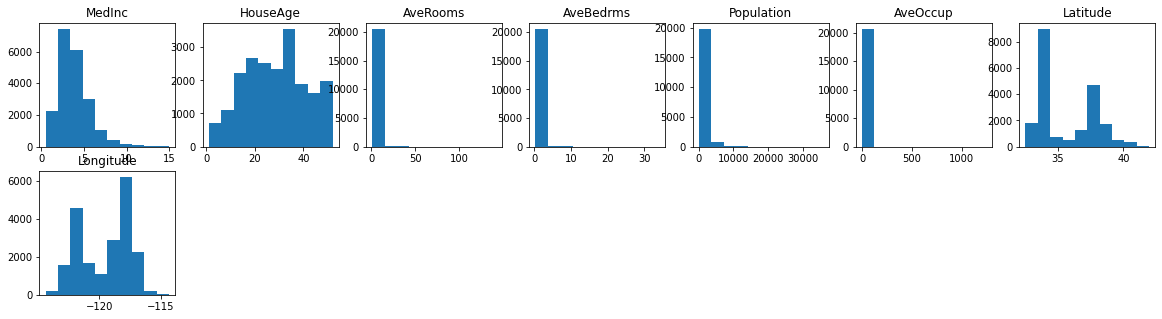

In [ ]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(df.columns):
    plt.subplot(2, 7, i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 相関

多重共線性(説明変数同士の相関が強い)がないようにする

ヒートマップで可視化する

In [ ]:
df_corr = df.corr()
display(df_corr)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


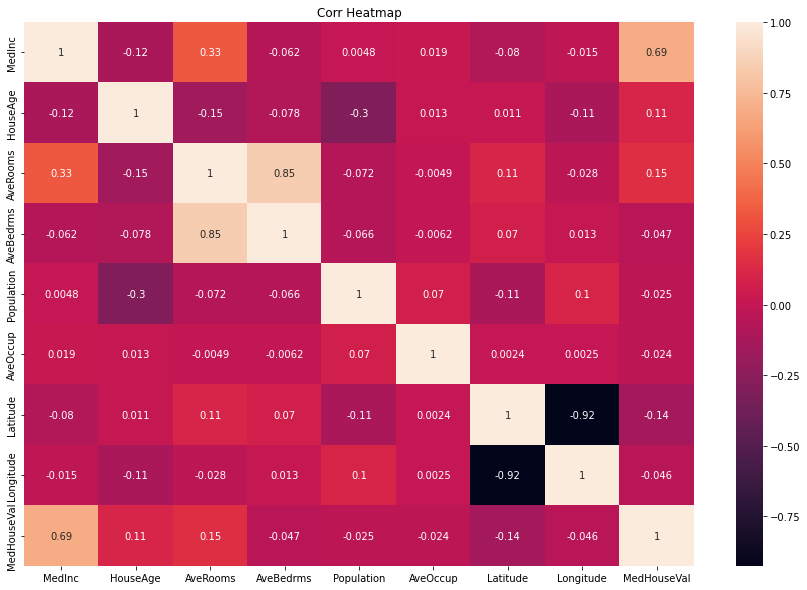

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True)
plt.title("Corr Heatmap")
plt.show()

### 単回帰

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
x = df[['MedInc']] # 一番相関高い変数で単回帰
y = t_df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, y_train.shape)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

(14448, 1) (14448, 1)


LinearRegression()

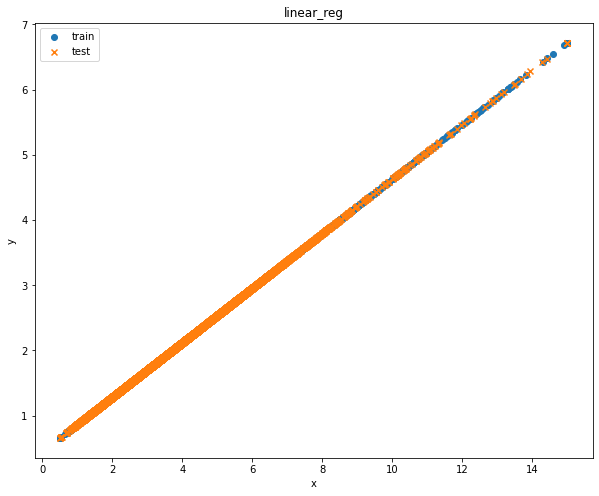

In [5]:
plt.figure(figsize=(10, 8))
train_pred = linear_reg.predict(x_train)
test_pred = linear_reg.predict(x_test)

plt.scatter(x_train, train_pred, label="train")
plt.scatter(x_test, test_pred, label="test", marker="x")
plt.xlabel("x")
plt.ylabel("y")
plt.title("linear_reg")
plt.legend()
plt.show()

In [6]:
# 傾きと切片

print(f"a = {linear_reg.coef_[0][0]}")
print(f"b = {linear_reg.intercept_[0]}")

a = 0.41819326975983784
b = 0.4479496555604323


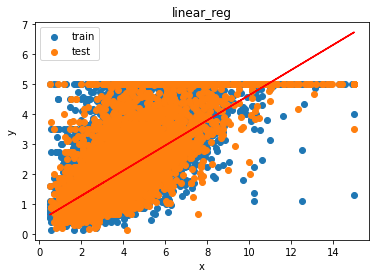

In [7]:
# 実際の値と比較

plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test, y_test, label="test")
plt.plot(x_test, test_pred, color="red")

plt.xlabel("x")
plt.ylabel("y")
plt.title("linear_reg")
plt.legend()
plt.show()

### 精度評価指標



*   MAE … 0に近いほど誤差が小さい
*   MSE … 0に近いほど誤差が小さい
*   RMSE … 0に近いほど誤差が小さい
*   R2 … 0〜1の範囲で1に近いほど精度が良い(0.7以上で精度高い)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, test_pred)
mse = mean_squared_error(y_test, test_pred)
rmse = np.sqrt(mse)
r2score = r2_score(y_test, test_pred)

print(f"MAE= {mae}")
print(f"MSE= {mse}")
print(f"RMSE= {rmse}")
print(f"R2= {r2score}")

MAE= 0.6231559293823171
MSE= 0.6917979868048499
RMSE= 0.8317439430526982
R2= 0.47293192589970245


### 構築したモデルを保存

In [11]:
import pickle

file_path = "linear_reg.pkl"
pickle.dump(linear_reg, open(file_path, "wb")) # 保存

In [12]:
model = pickle.load(open(file_path, "rb")) # 読み込み
pred = model.predict(x_test)
# print(pred[:5])

[[1.15101618]
 [1.50652228]
 [1.90330405]
 [2.84737536]
 [2.00571959]]
